### Data Loading
Loaded the dataset into a Pandas DataFrame for analysis.

In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
import seaborn as sns

# Suppress runtime warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Load your dataset into a Pandas DataFrame
# Replace 'Lottery.csv' with the actual file path or URL of your dataset
df = pd.read_csv('Lottery.csv')

### Data Preprocessing and Feature Engineering
Converted date column to datetime format and created a new column 'Total Winnings' based on winning numbers and multiplier. Imputed missing values with the mean.

In [2]:
# Assuming you have columns 'WinningNum1', 'WinningNum2', ..., 'WinningNum6' after splitting
winning_numbers_columns = [f'WinningNum{i}' for i in range(1, 7)]

# Feature Engineering: Create a new column 'Total Winnings'
# Calculate by summing the winning numbers and multiplying by the multiplier
def calculate_total_winnings(row):
    try:
        winning_numbers_sum = sum(row[winning_numbers_columns])
        total_winnings = winning_numbers_sum * row['Multiplier']
        return total_winnings
    except TypeError:
        # Handle non-numeric values in the 'Multiplier' or winning number columns
        return None

df['Total Winnings'] = df.apply(calculate_total_winnings, axis=1)

# Imputation: Fill missing values with the mean
df.fillna(df.mean(), inplace=True)


### Data Visualization: Distribution of Multiplier
Visualized the distribution of the Multiplier using a bar chart.

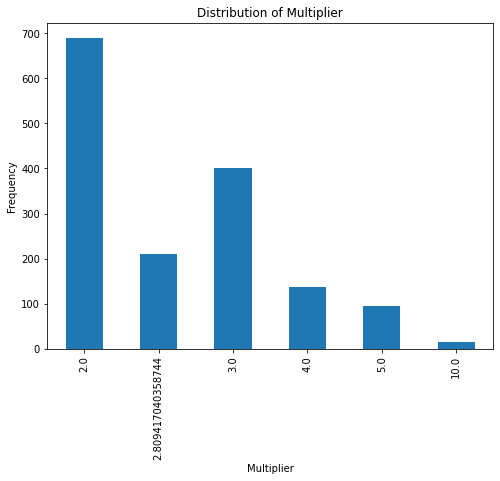

In [3]:
# Data Visualization: Distribution of the Multiplier
plt.figure(figsize=(8, 6))
df['Multiplier'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Multiplier')
plt.xlabel('Multiplier')
plt.ylabel('Frequency')
plt.show()

### Data Visualization: Impact of Multiplier on Total Winnings
Explored the relationship between the Multiplier and Total Winnings using a scatter plot.

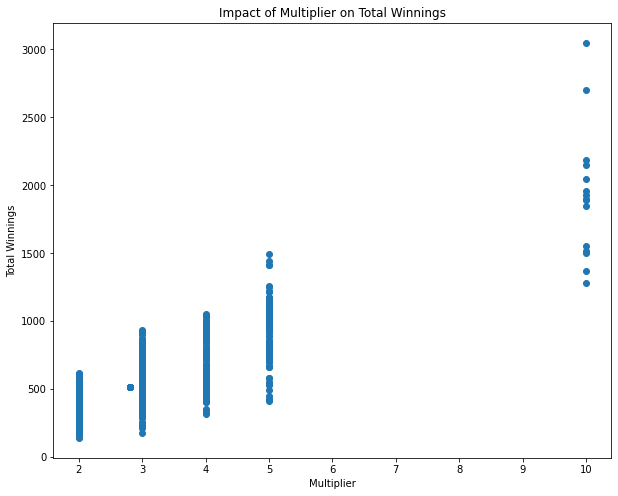

In [4]:
# Data Visualization: Relationship between Multiplier and Total Winnings
plt.figure(figsize=(10, 8))
plt.scatter(df['Multiplier'], df['Total Winnings'])
plt.title('Impact of Multiplier on Total Winnings')
plt.xlabel('Multiplier')
plt.ylabel('Total Winnings')
plt.show()

### Statistical Analysis: T-test for Multiplier Comparison
Performed t-tests to compare winnings between different multiplier values.

In [5]:
# Statistical Analysis: Perform t-test to compare winnings between different multiplier values
multiplier_values = df['Multiplier'].unique()
for i in range(len(multiplier_values)):
    for j in range(i + 1, len(multiplier_values)):
        multiplier1 = multiplier_values[i]
        multiplier2 = multiplier_values[j]
        group1 = df[df['Multiplier'] == multiplier1]['Total Winnings']
        group2 = df[df['Multiplier'] == multiplier2]['Total Winnings']
        t_stat, p_value = ttest_ind(group1, group2)
        print(f'Test between Multiplier {multiplier1} and Multiplier {multiplier2}: p-value = {p_value}')

Test between Multiplier 3.0 and Multiplier 2.0: p-value = 2.137360112316869e-131
Test between Multiplier 3.0 and Multiplier 10.0: p-value = 2.176611294544528e-114
Test between Multiplier 3.0 and Multiplier 4.0: p-value = 5.375235018812382e-18
Test between Multiplier 3.0 and Multiplier 5.0: p-value = 5.120961149603912e-65
Test between Multiplier 3.0 and Multiplier 2.809417040358744: p-value = 2.6456552537018283e-06
Test between Multiplier 2.0 and Multiplier 10.0: p-value = 1.3236870209703026e-252
Test between Multiplier 2.0 and Multiplier 4.0: p-value = 1.3609237413309665e-150
Test between Multiplier 2.0 and Multiplier 5.0: p-value = 6.63229278594384e-217
Test between Multiplier 2.0 and Multiplier 2.809417040358744: p-value = 1.1612389549408566e-100
Test between Multiplier 10.0 and Multiplier 4.0: p-value = 3.093675426504917e-46
Test between Multiplier 10.0 and Multiplier 5.0: p-value = 4.666832807206824e-25
Test between Multiplier 10.0 and Multiplier 2.809417040358744: p-value = 1.2899

### Machine Learning: Data Splitting
Split the data into features (X) and target variable (y) for machine learning. Also, divided the data into training and testing sets.

In [6]:
# Machine Learning: Split data into features (X) and target variable (y)
X = df[['Multiplier']]
y = df['Total Winnings']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Machine Learning: Linear Regression Model
Created and trained a linear regression model, made predictions, and evaluated model performance.

In [7]:
# Machine Learning: Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model Evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

Mean Absolute Error: 83.63521647576869
Mean Squared Error: 14584.069322611476
Root Mean Squared Error: 120.76452013158284


### Correlation Analysis
Computed the correlation coefficient between Multiplier and Total Winnings.

In [8]:
# Correlation Analysis: Compute Correlation Coefficient
correlation = df['Multiplier'].corr(df['Total Winnings'])
print(f'Correlation Coefficient: {correlation}')

Correlation Coefficient: 0.8489928040153681


- Multiplier Impact Analysis:
The analysis indicates a strong positive linear relationship between the multiplier and total winnings, as evidenced by the high correlation coefficient (0.849). This suggests that as the multiplier increases, total winnings tend to increase.
The t-tests further support the significance of differences in total winnings between different multiplier values. The small p-values indicate that these differences are statistically significant.
The scatter plot visually illustrates the impact of the multiplier on total winnings, showing a positive trend.

- Distribution of Multiplier:
The distribution of multipliers is right-skewed, with 2 being the most frequently occurring multiplier and 10 being the least frequent.
The mode of the distribution is 2, indicating that a multiplier of 2 is the most common setting for the lottery draws in your dataset.
The multiplier value of 10 appears to be an outlier or an infrequently occurring value compared to the rest of the distribution.

Summary:
The lottery draws in your dataset are commonly associated with a multiplier of 2, and there is a strong positive relationship between the multiplier and total winnings.

The distribution of multipliers is skewed towards lower values, suggesting that lower multipliers are more common, with a noticeable outlier at a multiplier value of 10.

Understanding these patterns can inform your analysis of the lottery data and guide further investigations into the factors influencing total winnings. If there are specific questions or areas you'd like to explore further, feel free to let me know!

### Visualization: Histogram of Winning Numbers

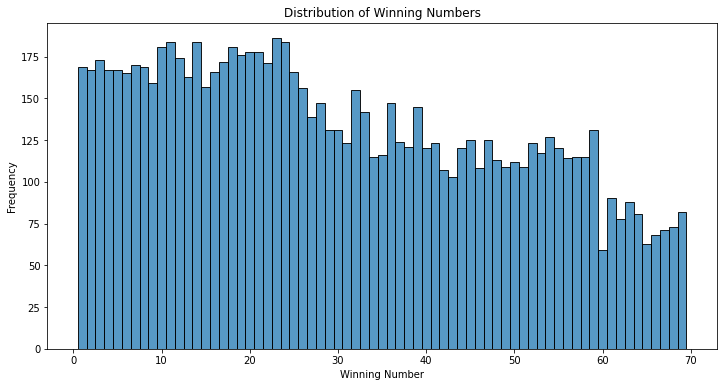

In [20]:
# Melt the DataFrame to plot the distribution of winning numbers
winning_numbers_melted = pd.melt(df, value_vars=winning_numbers_columns, var_name='Winning Number', value_name='Frequency')

plt.figure(figsize=(12, 6))
sns.histplot(x='Frequency', data=winning_numbers_melted, discrete=True, multiple='stack', palette='viridis')
plt.title('Distribution of Winning Numbers')
plt.xlabel('Winning Number')
plt.ylabel('Frequency')
plt.show()

### Visualization: Heatmap of Winning Numbers Correlation

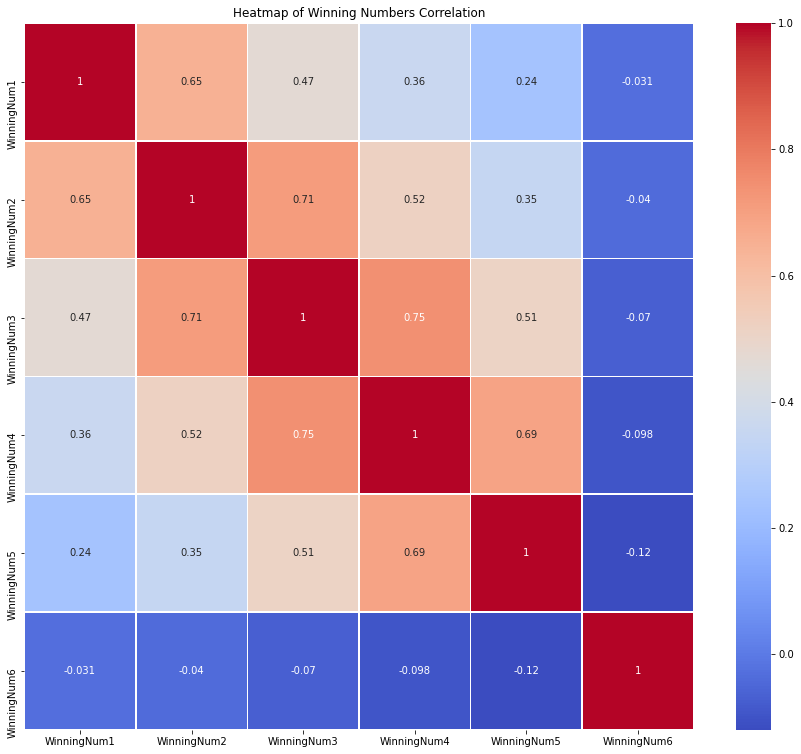

In [22]:
# Compute the correlation matrix
correlation_matrix = df[winning_numbers_columns].corr()

# Create a heatmap
plt.figure(figsize=(15,13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Winning Numbers Correlation')
plt.show()

### Visualization: Line Chart of Winning Numbers Over Time

<Figure size 1152x1440 with 0 Axes>

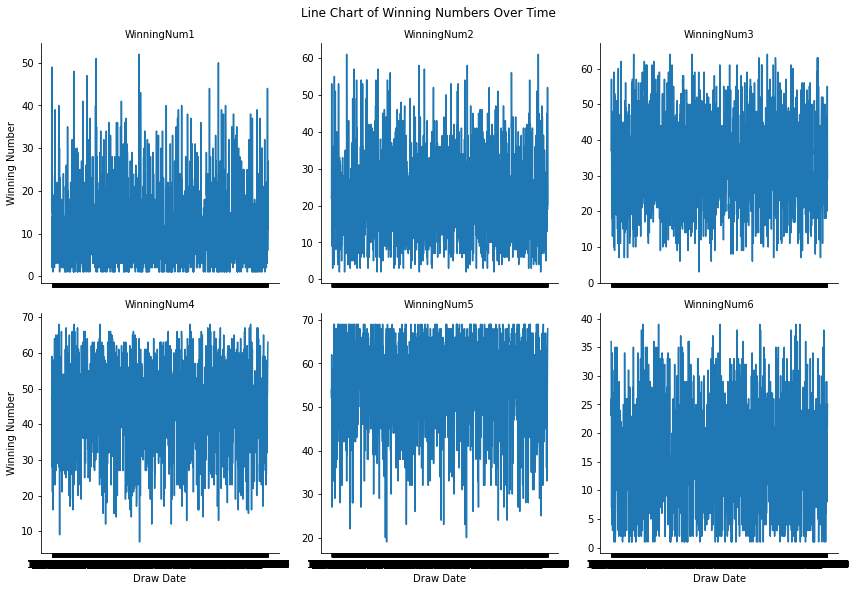

In [26]:
# Assuming 'Draw Date' is in datetime format
df.sort_values(by='Draw Date', inplace=True)

# Melt the DataFrame to plot the line chart
winning_numbers_melted = pd.melt(df, id_vars=['Draw Date'], value_vars=winning_numbers_columns, var_name='Winning Number', value_name='Number')

# Increase figure size
plt.figure(figsize=(16, 20))

# Use a facet grid for small multiples
g = sns.FacetGrid(winning_numbers_melted, col='Winning Number', col_wrap=3, height=4, sharey=False)
g.map(sns.lineplot, 'Draw Date', 'Number', ci=None)

# Set titles
g.set_titles(col_template='{col_name}')
g.set_axis_labels('Draw Date', 'Winning Number')

plt.suptitle('Line Chart of Winning Numbers Over Time', y=1.02)
plt.show()


Dense Region in the Middle:
Consistent Occurrences:
If there is a dense region in the middle, it suggests that these winning numbers have a relatively consistent occurrence over the observed period.
These numbers may be considered "average" or "moderate" in terms of frequency.

Dense Region in the Upper:
Frequent Peaks:
A dense region in the upper part of the chart indicates winning numbers that experience frequent peaks.
These numbers may have periods of high occurrence, leading to spikes in the chart.

Dense Region Almost at the Bottom:
Infrequent Occurrences:
A dense region almost at the bottom suggests winning numbers that have infrequent occurrences.
These numbers may be considered "rare" or "less common."